In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix


In [2]:
# engine: 파일명 또는 데이터에 한글 포함 -> "python" 사용
# df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", engine = "python")
df_raw = pd.read_csv("./df_t.csv")
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,Vol
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,934,1,8,2조,7.850335
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,937,1,8,2조,7.850335
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,889,1,8,3조,7.850280
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,885,1,8,3조,7.850280
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,873,1,8,1조,7.850376


In [3]:
df_raw_y = df_raw["SCALE"]
df_raw_x = df_raw.drop(["SCALE", "PLATE_NO", "ROLLING_DATE"], axis = 1, inplace = False)
df_raw_x =  pd.get_dummies(df_raw_x)
df_raw_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,...,0,0,0,1,0,0,0,1,0,0
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,...,0,0,0,1,0,0,0,1,0,0
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,...,0,0,1,0,1,0,0,0,1,0
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,...,0,0,1,0,1,0,0,0,1,0
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,...,0,0,1,0,0,1,1,0,0,0


In [4]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y .shape))

train data X size : (504, 96)
train data Y size : (504,)
test data X size : (216, 96)
test data Y size : (216,)


In [6]:
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4)
xgb.fit(df_train_x, df_train_y)
xgb_pred = xgb.predict(df_test_x)
accuracy_score(df_test_y, xgb_pred)

0.9907407407407407

In [7]:
xgb = XGBClassifier()
xgb_param_grid = {
    'n_estimators' : [600, 700, 800, 1000],
    'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [4, 6, 8, 10, 12]
}
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring = "accuracy", n_jobs = -1, verbose =1)
xgb_grid.fit(df_train_x, df_train_y)
print("최고 평균 정확도 : {0: .4f}".format(xgb_grid.best_score_))
print("최고의 파라미터 : ", xgb_grid.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


최고 평균 정확도 :  0.9802
최고의 파라미터 :  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 600}


In [8]:
cv_result_df = pd.DataFrame(xgb_grid.cv_results_)
cv_result_df.sort_values(by = ['rank_test_score'], inplace = True)

In [9]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
10,"{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",0.980198,1
36,"{'learning_rate': 0.05, 'max_depth': 12, 'n_es...",0.980198,1
28,"{'learning_rate': 0.05, 'max_depth': 8, 'n_est...",0.980198,1
4,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.980198,1
5,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.980198,1
6,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.980198,1
7,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.980198,1
9,"{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",0.980198,1
24,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",0.980198,1
11,"{'learning_rate': 0.01, 'max_depth': 8, 'n_est...",0.980198,1


In [10]:
print(cv_result_df['params'][0])

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 600}


In [15]:
xgb = XGBClassifier(n_estimators =600, learning_rate = 0.01, max_depth = 6)
evals = [(df_train_x, df_train_y)]
xgb.fit(df_train_x, df_train_y, early_stopping_rounds = 3, eval_metric = "logloss", eval_set = evals, verbose =1)

[0]	validation_0-logloss:0.684667
Will train until validation_0-logloss hasn't improved in 3 rounds.
[1]	validation_0-logloss:0.676551
[2]	validation_0-logloss:0.668598
[3]	validation_0-logloss:0.660789
[4]	validation_0-logloss:0.653129
[5]	validation_0-logloss:0.645608
[6]	validation_0-logloss:0.63823
[7]	validation_0-logloss:0.630986
[8]	validation_0-logloss:0.623866
[9]	validation_0-logloss:0.616882
[10]	validation_0-logloss:0.610018
[11]	validation_0-logloss:0.603279
[12]	validation_0-logloss:0.596655
[13]	validation_0-logloss:0.590149
[14]	validation_0-logloss:0.583756
[15]	validation_0-logloss:0.577473
[16]	validation_0-logloss:0.571295
[17]	validation_0-logloss:0.565227
[18]	validation_0-logloss:0.55926
[19]	validation_0-logloss:0.553393
[20]	validation_0-logloss:0.547624
[21]	validation_0-logloss:0.541948
[22]	validation_0-logloss:0.536366
[23]	validation_0-logloss:0.53088
[24]	validation_0-logloss:0.525481
[25]	validation_0-logloss:0.52017
[26]	validation_0-logloss:0.514947
[2

[230]	validation_0-logloss:0.109527
[231]	validation_0-logloss:0.109003
[232]	validation_0-logloss:0.108394
[233]	validation_0-logloss:0.107792
[234]	validation_0-logloss:0.107285
[235]	validation_0-logloss:0.10677
[236]	validation_0-logloss:0.106268
[237]	validation_0-logloss:0.105772
[238]	validation_0-logloss:0.10528
[239]	validation_0-logloss:0.104704
[240]	validation_0-logloss:0.104222
[241]	validation_0-logloss:0.103546
[242]	validation_0-logloss:0.103074
[243]	validation_0-logloss:0.102517
[244]	validation_0-logloss:0.101844
[245]	validation_0-logloss:0.101385
[246]	validation_0-logloss:0.100738
[247]	validation_0-logloss:0.100288
[248]	validation_0-logloss:0.099638
[249]	validation_0-logloss:0.099197
[250]	validation_0-logloss:0.098673
[251]	validation_0-logloss:0.098053
[252]	validation_0-logloss:0.097576
[253]	validation_0-logloss:0.096879
[254]	validation_0-logloss:0.096412
[255]	validation_0-logloss:0.095951
[256]	validation_0-logloss:0.095494
[257]	validation_0-logloss:0.0

[459]	validation_0-logloss:0.041953
[460]	validation_0-logloss:0.041842
[461]	validation_0-logloss:0.041747
[462]	validation_0-logloss:0.041617
[463]	validation_0-logloss:0.041469
[464]	validation_0-logloss:0.041357
[465]	validation_0-logloss:0.041247
[466]	validation_0-logloss:0.04114
[467]	validation_0-logloss:0.041013
[468]	validation_0-logloss:0.040868
[469]	validation_0-logloss:0.040761
[470]	validation_0-logloss:0.040637
[471]	validation_0-logloss:0.040494
[472]	validation_0-logloss:0.040389
[473]	validation_0-logloss:0.040267
[474]	validation_0-logloss:0.040126
[475]	validation_0-logloss:0.040027
[476]	validation_0-logloss:0.039888
[477]	validation_0-logloss:0.039792
[478]	validation_0-logloss:0.039672
[479]	validation_0-logloss:0.039536
[480]	validation_0-logloss:0.039439
[481]	validation_0-logloss:0.039304
[482]	validation_0-logloss:0.039217
[483]	validation_0-logloss:0.0391
[484]	validation_0-logloss:0.038968
[485]	validation_0-logloss:0.038883
[486]	validation_0-logloss:0.03

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

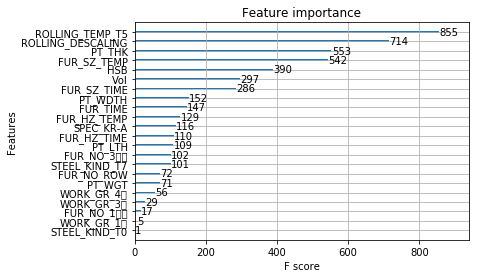

In [16]:
fig, ax = plt.subplots()
plot_importance(xgb, ax = ax)

In [18]:
xgb_pred = xgb.predict(df_test_x)
print(accuracy_score(df_test_y, xgb_pred))
print(confusion_matrix(df_test_y, xgb_pred))

0.9953703703703703
[[145   0]
 [  1  70]]
